<font size=6><b>Lec00. ARIMA  : Univariate Time Series (UTS)</b></font><br>

* Univariate vs Multivariate Time Series (일변량 vs. 다변량)

# Comprehensive guide to creating time series forecast
* ref : https://www.analyticsvidhya.com/blog/2016/02/time-series-forecasting-codes-python/

* Learn the steps to create a Time Series forecast
* Additional focus on Dickey-Fuller test & ARIMA (Autoregressive, moving average) models
* Learn the concepts theoretically as well as with their implementation in python

* What makes Time Series Special?
* Loading and Handling Time Series in Pandas
* How to Check Stationarity of a Time Series?
* How to make a Time Series Stationary?
* Forecasting a Time Series

<b>ARIMA(Auto Regressive Integrated Moving Average) </b>
    확률에 기반하여 시계열을 분석하고 예측하는 방법 중 하나

     
<b>ARIMA 시계열 분석 절차 </b><br>
<font color=red><b>
	------------------------------------------------------------------------------------<br>
	Box-Jenkins 방법론 절차 <br>
                : 모형의 적합성 여부 판단<br>
		: *정상성의 데이터인 경우   1)모형식별- 2)모수추정- 3)모형적합성진단- 4)예측<br>
	------------------------------------------------------------------------------------ <br>
    </b></font>
    
<b>데이터 정상성</b>

 	정상성이란, 시계열 성질들이 시간 흐름에 따라 불변(time-invariant)함
        : 평균,분산 : 시간 t에 상관없이 일정
   	  공분산 : 오직 시차(k)에만 의존
    
    <br>
    
   시계열 분해법(Time-series decomposition)<br>
	1. 이동평균평활법을 활용한 시계열 분해<br>
	2. 전통적인 시계열 분해법<br>
	------------------------------------------------------------------------------------<br>
	Data preprocessing(Differencing) : 데이터전처리(차분)<br>
	ARIMA 모델을 적용하려는 시계열 데이터가 '정상성'을 반드시 가져야 한다<br>
	차분 : 현 시점의 데이터에서 과거 시점의 데이터를 빼는 것<br>
   
   
<b>Indentify Model(Test) 	 : 모형식별</b> 

 	: 주어진 시계열 데이터가 정상성인지 아닌지를 판단
	: ACF(자기상관함수), PACF(편자기상관함수) 관찰
	: 자기상관성도표


===================================================================================================================

<b>Estimate Params 		 : 모수추정</b>
    
    파라미터 추정
	1) d(차분)의 경우, 데이터의 특성에 따라 1 or 2로 결정
	2) d(차분) : 1~2차분 :  ACF를 이용해 stationary하게 변함을 확인
	3) p, q : 1~N으로 그리드 서치를 진행한 후 AIC가 낮은 모수 선택
                : p+q<2,  p*q=0	  : 자기회귀 모형(AR)이나 이동평균 모형(MA) 중 하나의 경향만을 강하게 갖는다
      시차 k가 달라짐에 따라 ACF, PACF 함수값이 어떻게 달라지는지를 확인


<b>Diagnosis Check(Residual) 	 : 모형적합성 진단(잔차그래프)</b>


<b>Use Model To Forcast 	 : 예측</b>

In [1]:
import pandas as pd
import numpy as np
import datetime as dt

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action='ignore')
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA', FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa', Warning)

#-------------------- 차트 관련 속성 (한글처리, 그리드) -----------
#font_path='C:\\Windows\\Fonts\\\x7f\x7f\x7f\x7fBOLD.TTF'
#plt.rc('font', family='NanumGothicOTF') # For MacOS
plt.rcParams['font.family']= 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False
sns.set()

#-------------------- 주피터 , 출력결과 넓이 늘리기 ---------------
from IPython.core.display import display, HTML
display(HTML("<style>.container{width:100% !important;}</style>"))
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('max_colwidth', None)

# 한글 폰트 사용을 위해서 세팅
from matplotlib import font_manager, rc
font_path = "C:\\Windows\\Fonts\\\x7f\x7f\x7f\x7fBOLD.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

# Load Data

## 원본 Load

In [2]:
data = pd.read_csv('./dataset/AirPassengers.csv')
print (data.shape)
print (data.info())
data.head()

(144, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB
None


,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


## 시계열 가공 후 Load

In [3]:
dateparse = lambda dates: dt.datetime.strptime(dates, '%Y-%m')
ts = pd.read_csv('./dataset/AirPassengers.csv', parse_dates=['Month'], index_col='Month',date_parser=dateparse)
print (ts.shape)
print (ts.info())
ts.head()

(144, 1)
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   #Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB
None


,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


# 정상성(stationarity test) 확인
---


<b>통계적 가설 검증을 통한 시계열 정상성(stationarity test) 확인 방법
  * [1] 시계열 그래프 (time series plot)
  * [2] 통계적 가설 검정 (statistical hypothesis test)
     - (a) Augmented Dickey-Fuller ("ADF") test
     - (b) Kwiatkowski-Phillips-Schmidt-Shin ("KPSS") test
  * [3] 자기상관함수(ACF), 편자기상관함수(PACF)
     - TSP(deTrend Stationary Process)
     - DSP(Difference Stationary Process)
---    

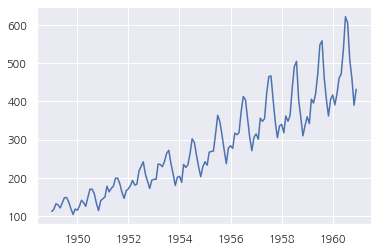

In [4]:
plt.plot(ts) 

## Augmented Dickey-Fuller
* 정상성을 확인하기 위한 통계적 테스트 (null hypothesis is TS is non-stationary)
  * Null Hypothesis: The series has a unit root.(not stationary.) 
  * Alternate Hypothesis: The series has no unit root.(stationary.)<br><br>
* 귀무가설 (H0): 정상 시계열이 아니다  <-- p-value 0.991880
* 대립가설 (H1): 정상 시계열이다
*<font color=red>'추세'에 대해서는 잘 검정하지만, '분산', '계절성'에 대해서는 잘 검정하지 못한다.  
    

In [5]:
from statsmodels.tsa.stattools import adfuller
def my_check_stationarity_dickey(timeseries): 
    print('Results of Dickey-Fuller Test')
    df_test = adfuller(timeseries.values.reshape(-1), autolag='AIC') #AIC or BIC
    print(df_test,"\n")
    temp = pd.Series(df_test[0:4], index=['Statistic','p-value','LagsUsed','ObsNum'])
    for key,value in df_test[4].items():
        temp[f'CriticalValue({key})'] = value
    print(temp)

print("""
* 귀무가설 (H0): 정상 시계열이 아니다       <-- p-value 0.991880
* 대립가설 (H1): 정상 시계열이다 
""")    
my_check_stationarity_dickey(ts)


* 귀무가설 (H0): 정상 시계열이 아니다       <-- p-value 0.991880
* 대립가설 (H1): 정상 시계열이다 

Results of Dickey-Fuller Test
(0.8153688792060482, 0.991880243437641, 13, 130, {'1%': -3.4816817173418295, '5%': -2.8840418343195267, '10%': -2.578770059171598}, 996.692930839019) 

Statistic               0.815369
p-value                 0.991880
LagsUsed               13.000000
ObsNum                130.000000
CriticalValue(1%)      -3.481682
CriticalValue(5%)      -2.884042
CriticalValue(10%)     -2.578770
dtype: float64


## Kwiatkowski-Phillips-Schmidt-Shin(KPSS)
* Null Hypothesis: The series stationary
* Alternate Hypothesis: The series not stationary<br><br>
* 귀무가설 (H0): 정상 시계열이다 
* 대립가설 (H1): 정상 시계열이 아니다 <-- p-value 0.010000

In [6]:
from statsmodels.tsa.stattools import kpss 
import pandas as pd 
def my_check_stationarity_kpss(timeseries): 
    print("Results of KPSS Test") 
    df_test = kpss(timeseries.values.reshape(-1), regression="c", nlags="auto") 
    temp = pd.Series( df_test[0:3], index=["Statistic", "p-value", "LagsUsed"] ) 
    for key,value in df_test[3].items():
        temp[f'CriticalValue({key})'] = value
    print(temp)

print("""
* 귀무가설 (H0): 정상 시계열이다 
* 대립가설 (H1): 정상 시계열이 아니다   <-- p-value 0.010000
""")        
my_check_stationarity_kpss(ts)


* 귀무가설 (H0): 정상 시계열이다 
* 대립가설 (H1): 정상 시계열이 아니다   <-- p-value 0.010000

Results of KPSS Test
Statistic              1.651312
p-value                0.010000
LagsUsed               8.000000
CriticalValue(10%)     0.347000
CriticalValue(5%)      0.463000
CriticalValue(2.5%)    0.574000
CriticalValue(1%)      0.739000
dtype: float64


c:\ai\pythonproject\venv\lib\site-packages\statsmodels\tsa\stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


# 정상성을 위한 시계열 데이터 변환 
* ref : https://rfriend.tistory.com/698?category=675919
* <font color=red><b>(1) Variance </b></font>: 분산이 고정적이지 않은 경우 분산 안정화 변환 (variance stabilizing transformation, VST)
* <font color=red><b>(2) Trend  </b></font>: 추세가 있는 경우 차분을 통한 추세 제거 (de-trend by differencing)
* <font color=red><b>(3) Seasonality </b></font>: 계절성이 있는 경우 계절 차분을 통한 계절성 제거 (de-seasonality by seaanl differencing)

<img src="https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FdjfTHO%2FbtrjyI8Tize%2FEHZ6jK1OybrKjbgpKugd8K%2Fimg.png" width=500>

### 분산 안정화 변환 (variance stabilizing transformation, VST)
* 시간이 흐릴수록 분산이 커지는 경우 : 로그 변환(log transformation) 또는제곱근 변환 (root transformation)

<img src="https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FpWIuL%2FbtrjxcoTD9Z%2FnhR2sKyDJTdsfocMirmUcK%2Fimg.png" width=400>


* 귀무가설 (H0): 정상 시계열이다 
* 대립가설 (H1): 정상 시계열이 아니다 <-- p-value 0.010000

Results of KPSS Test
Statistic              1.668651
p-value                0.010000
LagsUsed               8.000000
CriticalValue(10%)     0.347000
CriticalValue(5%)      0.463000
CriticalValue(2.5%)    0.574000
CriticalValue(1%)      0.739000
dtype: float64


c:\ai\pythonproject\venv\lib\site-packages\statsmodels\tsa\stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


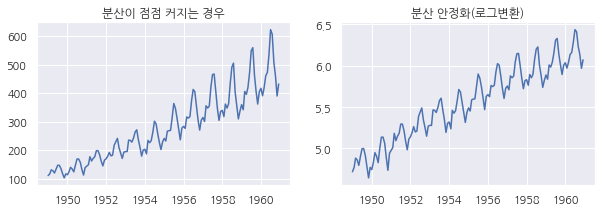

In [7]:
#-----------------------------------------------------
ts_log = ts.copy()
ts_log['#Passengers'] = np.log(ts_log['#Passengers'])
#-----------------------------------------------------
print("""
* 귀무가설 (H0): 정상 시계열이다 
* 대립가설 (H1): 정상 시계열이 아니다 <-- p-value 0.010000
""")
my_check_stationarity_kpss(ts_log)
#-----------------------------------------------------
p, axes = plt.subplots(1,2,figsize=(10, 3))
axes[0].plot(ts)
axes[0].set_title("분산이 점점 커지는 경우")
axes[1].plot(ts_log)
axes[1].set_title("분산 안정화(로그변환)")
plt.show()

### 차분을 통한 추세 제거 (de-trend by differencing)


* 귀무가설 (H0): 정상 시계열이다      <-- p-value 0.100000
* 대립가설 (H1): 정상 시계열이 아니다 

Results of KPSS Test
Statistic              0.038304
p-value                0.100000
LagsUsed               6.000000
CriticalValue(10%)     0.347000
CriticalValue(5%)      0.463000
CriticalValue(2.5%)    0.574000
CriticalValue(1%)      0.739000
dtype: float64


c:\ai\pythonproject\venv\lib\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


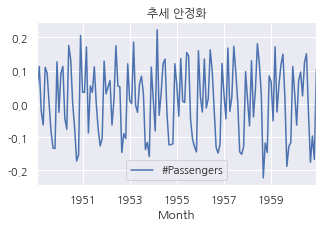

In [8]:
ts_log_trend_diff = ts_log.diff(1).dropna() 
#-----------------------------------------------------
print("""
* 귀무가설 (H0): 정상 시계열이다      <-- p-value 0.100000
* 대립가설 (H1): 정상 시계열이 아니다 
""")
my_check_stationarity_kpss(ts_log_trend_diff)
#-----------------------------------------------------
ts_log_trend_diff.plot(figsize=(5, 3)) 
plt.title("추세 안정화")
plt.show()

### 계절 차분을 통한 계절성 제거 (de-seasonality by seaanl differencing)


* 귀무가설 (H0): 정상 시계열이다      <-- p-value 0.100000
* 대립가설 (H1): 정상 시계열이 아니다 

Results of KPSS Test
Statistic              0.073191
p-value                0.100000
LagsUsed               3.000000
CriticalValue(10%)     0.347000
CriticalValue(5%)      0.463000
CriticalValue(2.5%)    0.574000
CriticalValue(1%)      0.739000
dtype: float64


c:\ai\pythonproject\venv\lib\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


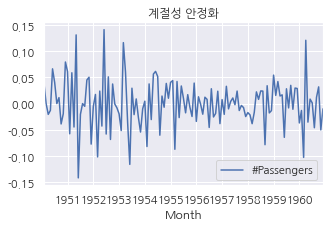

In [9]:
ts_log_trend_seasonal_diff = ts_log_trend_diff.diff(12).dropna() 
#-----------------------------------------------------
print("""
* 귀무가설 (H0): 정상 시계열이다      <-- p-value 0.100000
* 대립가설 (H1): 정상 시계열이 아니다 
""")
my_check_stationarity_kpss(ts_log_trend_seasonal_diff)
#-----------------------------------------------------
ts_log_trend_seasonal_diff.plot(figsize=(5, 3)) 
plt.title("계절성 안정화")
plt.show()

### Plotting Rolling Statistics
* 이동평균,이동분산을 플로팅하고 시간에 따른 변화 확인

Plotting Rolling Statistics Test

    * 귀무가설 (H0): 정상 시계열이다      <-- p-value 0.100000
    * 대립가설 (H1): 정상 시계열이 아니다 
    
Results of KPSS Test
Statistic              0.04306
p-value                0.10000
LagsUsed               5.00000
CriticalValue(10%)     0.34700
CriticalValue(5%)      0.46300
CriticalValue(2.5%)    0.57400
CriticalValue(1%)      0.73900
dtype: float64


c:\ai\pythonproject\venv\lib\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


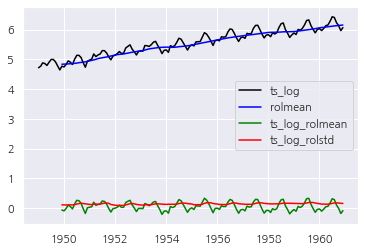

In [10]:
def my_check_stationarity_rolling(timeseries):
    print('Plotting Rolling Statistics Test')
    #-----------------------------------------------------
    ts_log = timeseries.copy()
    ts_log['#Passengers'] = np.log(ts_log['#Passengers'])
    rolmean = ts_log.rolling(window=12).mean()
    rolstd  = ts_log.rolling(window=12).std()
    
    ts_log_rolmean_diff = ts_log - rolmean 
    ts_log_rolmean_diff.dropna(inplace=True)
    #-----------------------------------------------------
    print("""
    * 귀무가설 (H0): 정상 시계열이다      <-- p-value 0.100000
    * 대립가설 (H1): 정상 시계열이 아니다 
    """)
    my_check_stationarity_kpss(ts_log_rolmean_diff)
    #-----------------------------------------------------

    # plt.plot(timeseries, color='blue',  label='orig')
    plt.plot(ts_log,                 color='black',  label='ts_log')
    plt.plot(rolmean,                color='blue',  label='rolmean')
    plt.plot(ts_log_rolmean_diff,    color='green',   label='ts_log_rolmean')
    plt.plot(rolstd,                 color='red', label='ts_log_rolstd')
    plt.legend()
    plt.show()  

# ts = pd.read_csv('./dataset/AirPassengers.csv', parse_dates=['Month'], index_col='Month',date_parser=dateparse)
my_check_stationarity_rolling(ts)    

### 지수가중이동평균 : EWMA(Exponentially Weighted Moving Average)

* 변동성 산출 시 최근 수익률에 높은 가중치를 부여하여 변동성 추정치가 최근 변화에 민감하게 반응
* 주식의 지수가중평균을 구할 때 λ는 0.94를 적용하는 것이 관례
<img src='https://mblogthumb-phinf.pstatic.net/MjAxODA1MjNfMjMy/MDAxNTI3MDgwNzI5MzY3.DUgy_hLvI3Vu4OkvGASbtVAbetarrbsgrikSLCTKy0Ug.FWtXyCqMCGKO4MMJiAyvvrOMLUmFJyI-v8YORLUddUYg.JPEG.61stu01/%EB%B3%80%EB%8F%99%EC%84%B1_%EB%B3%80%ED%99%94.jpg?type=w2' width=600>

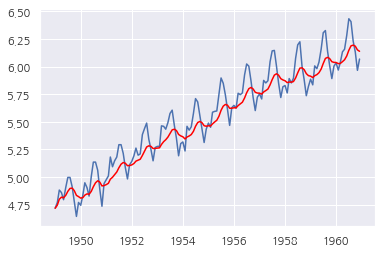

In [11]:
ts = pd.read_csv('./dataset/AirPassengers.csv', parse_dates=['Month'], index_col='Month',date_parser=dateparse)
ts_log = ts.copy()
ts_log['#Passengers'] = np.log(ts_log['#Passengers'])
    
expwighted_avg = ts_log.ewm(span=12).mean()
plt.plot(ts_log)
plt.plot(expwighted_avg, color='red')

In [12]:
ts_log_ewma_diff = ts_log - expwighted_avg
#-----------------------------------------------------
print("""
* 귀무가설 (H0): 정상 시계열이다      <-- p-value 0.100000
* 대립가설 (H1): 정상 시계열이 아니다 
""")
my_check_stationarity_kpss(ts_log_ewma_diff)
#-----------------------------------------------------


* 귀무가설 (H0): 정상 시계열이다      <-- p-value 0.100000
* 대립가설 (H1): 정상 시계열이 아니다 

Results of KPSS Test
Statistic              0.027555
p-value                0.100000
LagsUsed               3.000000
CriticalValue(10%)     0.347000
CriticalValue(5%)      0.463000
CriticalValue(2.5%)    0.574000
CriticalValue(1%)      0.739000
dtype: float64


c:\ai\pythonproject\venv\lib\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


### 분해

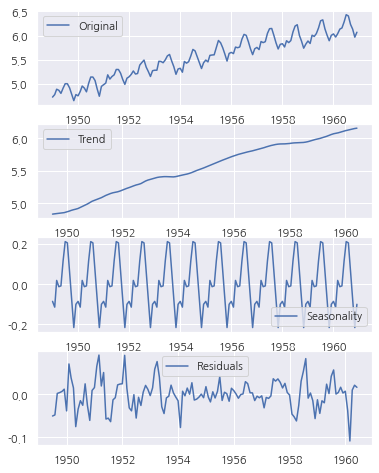

In [13]:
from statsmodels.tsa.seasonal import seasonal_decompose
ts = pd.read_csv('./dataset/AirPassengers.csv', parse_dates=['Month'], index_col='Month',date_parser=dateparse)
ts_log = ts.copy()
ts_log['#Passengers'] = np.log(ts_log['#Passengers'])
decomp = seasonal_decompose(ts_log)

trend    = decomp.trend
seasonal = decomp.seasonal
residual = decomp.resid

p, axes = plt.subplots(4,1,figsize=(6, 8))
axes[0].plot(ts_log, label='Original')
axes[0].legend()
axes[1].plot(trend, label='Trend')
axes[1].legend()
axes[2].plot(seasonal,label='Seasonality')
axes[2].legend()
axes[3].plot(residual, label='Residuals')
axes[3].legend()
plt.show()

In [14]:
residual.dropna(inplace=True)
#-----------------------------------------------------
print("""
* 귀무가설 (H0): 정상 시계열이다      <-- p-value 0.100000
* 대립가설 (H1): 정상 시계열이 아니다 
""")
my_check_stationarity_kpss(residual)
#-----------------------------------------------------


* 귀무가설 (H0): 정상 시계열이다      <-- p-value 0.100000
* 대립가설 (H1): 정상 시계열이 아니다 

Results of KPSS Test
Statistic              0.023949
p-value                0.100000
LagsUsed               4.000000
CriticalValue(10%)     0.347000
CriticalValue(5%)      0.463000
CriticalValue(2.5%)    0.574000
CriticalValue(1%)      0.739000
dtype: float64


c:\ai\pythonproject\venv\lib\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


# 시계열 예측
* ref : https://otexts.com/fppkr/arima.html


<font color=red><b>ARIMA(Autoregressive Integrated Moving Average) 
  <img src="https://www.machinelearningplus.com/wp-content/uploads/2019/02/Equation-4-min.png" width=600>
---
<pre>    
<font color=red><b>AR(Autoregression:자기회귀)</b></font> - 이전 관측값의 오차항이 이후 관측값에 영향을 주는 모형
  <img src="https://www.machinelearningplus.com/wp-content/uploads/2019/02/Equation-1-min.png" width=400>
<font color=red><b>Intgrated</b></font>

<font color=red><b>MA(Moving Average:이동평균)</b></font> - 관측값이 이전의 연속적인 오차항의 영향을 받는다는 모형
  <img src="https://www.machinelearningplus.com/wp-content/uploads/2019/02/Equation-2-min.png" width=400>


In [15]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# from statsmodels.tsa.arima.model import ARIMA  #statsmodel version 1.12  over
from statsmodels.tsa.arima_model import ARIMA  #statsmodel version 1.10.2  under

* Data Load

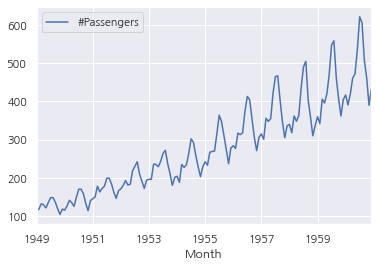

In [19]:
ts = pd.read_csv('./dataset/AirPassengers.csv', parse_dates=['Month'], index_col='Month',date_parser=dateparse)
ts.plot()
plt.show()

# Stationary

## AR Model

## MA model

## ARIMA

# Build high-performance time series models using AutoArima
* ref : https://www.analyticsvidhya.com/blog/2018/08/auto-arima-time-series-modeling-python-r/

In [ ]:
# ! pip install pmdarima

In [ ]:
from pmdarima.arima import auto_arima

In [ ]:
#load the data
data = pd.read_csv('./dataset/AirPassengers.csv')

#divide into train and validation set
train = data[:int(0.8*(len(data)))]
valid = data[int(0.8*(len(data))):]

#preprocessing (since arima takes univariate series as input)
train.drop('Month',axis=1,inplace=True)
valid.drop('Month',axis=1,inplace=True)

#plotting the data
train['#Passengers'].plot()
valid['#Passengers'].plot()

In [ ]:
# ! pip uninstall statsmodels 
# ! pip install statsmodels --pgrade
# --------------------------
# # from statsmodels.compat.pandas import Appender  # --error
# # from pmdarima.arima.utils import ndiffs  #--error
# # from pandas.util._decorators import Appende     # old

In [ ]:
import pandas as pd
import statsmodels as st
print (pd.__version__, st.__version__)

In [ ]:
from pmdarima.arima.utils import ndiffs
import pmdarima as pm

In [ ]:
kpss_diffs = ndiffs(train, alpha=0.05, test='kpss', max_d=6)
adf_diffs  = ndiffs(train, alpha=0.05, test='adf', max_d=6)
n_diffs = max(adf_diffs, kpss_diffs)
print(f"추정된 차수 d = {n_diffs}")

model = pm.auto_arima(y = train        # 데이터
                      , d = 1            # 차분 차수, ndiffs 결과!
                      , start_p = 0 
                      , max_p = 3   
                      , start_q = 0 
                      , max_q = 3   
                      , m = 1            #계절적 특징X ,  m=1 --> seasonal=False
                      , seasonal = False #계절성 ARIMA가 아니라면 필수!
                      , stepwise = True  #최적의 모수를 찾기 위해 힌드만-칸다카르 알고리즘 적용여부
                                         #False면 모든 모수 조합으로 모형 적합
                      , trace=True
                      ,error_action='ignore', suppress_warnings=True
                     )
model.fit(train)
print(model.summary())

In [ ]:
forecast = model.predict(n_periods=len(valid))
forecast = pd.DataFrame(forecast,index = valid.index,columns=['Prediction'])
forecast.head()

In [ ]:
from sklearn.metrics import mean_squared_error
plt.plot(train, label='Train')
plt.plot(valid, label='Valid')
plt.plot(forecast, label='Pred' )
plt.legend()
plt.show()
rmse = np.sqrt(mean_squared_error(valid, forecast))
print(f"RMSE: {rmse:.4f}")